In [34]:
import os
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.image import imread
import rasterio
from rasterio.mask import mask
import geopandas as gpd

In [139]:
# Get the list of retiled images
mask_files = '/scratch/zach/masks4/'
source_files = '/scratch/zach/'
files = os.listdir(mask_files)

In [140]:
def get_example():
	for fn in files:
		with rasterio.open(mask_files+fn) as src:
			if src.read().sum() > 0:
				yield src.read()

In [141]:
e_iter = get_example()

In [146]:
img = next(e_iter)
plt.figure(figsize=(20,20))
plt.imshow(img.T)

StopIteration: 

In [105]:
224*32+70*(1-32)

4998

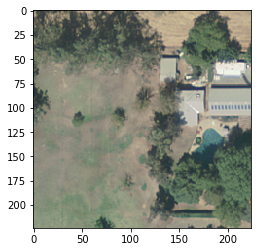

In [23]:
src_img = imread('/scratch/zach/solar-pv/'+fn)
plt.imshow(src_img)

In [17]:
img = imread(mask_files+files[0])

In [118]:
data_path = "/data/users/zdc6/data/SolarPV/fresno/"
shape_file = "/data/users/zdc6/data/SolarPV/SolarArrayPolygons.geojson"
files = np.array(list(filter(lambda x: x[-3:] == "tif", os.listdir(data_path))))

In [119]:
df = gpd.read_file(shape_file).to_crs(epsg=26911)

In [120]:
def get_mask_example():
	for fn in files:
		with rasterio.open(data_path+fn) as src:
			out_image, out_transform = mask(src, df['geometry'])
			out_meta = src.meta.copy()
			if out_image.sum() > 0:
				yield out_image, out_transform, out_meta, fn
			

In [121]:
ex_iter = get_mask_example()

In [122]:
img, trs, meta, fn = next(ex_iter)

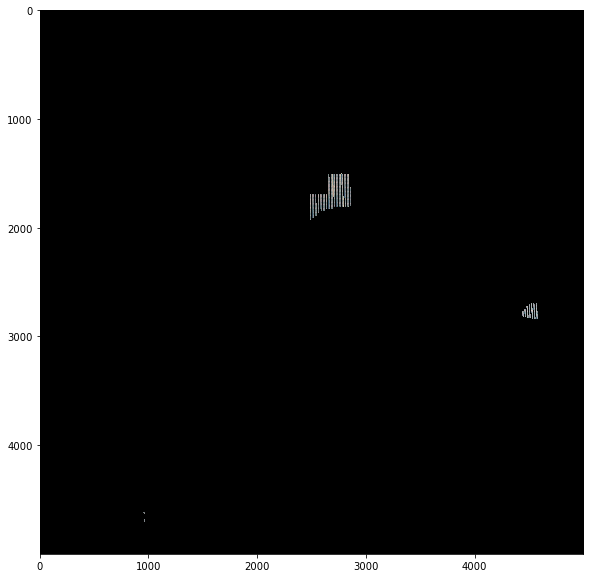

In [51]:
plt.figure(figsize=(10,10))
plt.imshow(img.T)

In [45]:
meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 5000,
 'height': 5000,
 'count': 3,
 'crs': CRS.from_epsg(26911),
 'transform': Affine(0.3, 0.0, 253500.0,
        0.0, -0.3, 4065000.0)}

In [15]:
# Testing out the solar dataset
from src.tasks.solar import SolarPVDataset
import numpy as np

from torchvision import transforms

In [16]:
data_path = "/scratch/zach/solar-pv/"
mask_path = "/scratch/zach/mask_tensors/"
files = np.array(list(filter(lambda x: x[-3:] == "tif", os.listdir(data_path))))
# tr_normalize = transforms.Normalize(
#         mean=[0.494, 0.491, 0.499], std=[0.142, 0.141, 0.135]
#     )

trans = transforms.Compose(
        [
            transforms.ToTensor()
        ]
    )

ds = SolarPVDataset(data_path, files, mask_path, trans)

In [18]:
img, mask = ds[0]

In [7]:
mask.sum().item()

0.0

In [3]:
for i in range(100000):
	img, mask = ds[i]

	if mask.sum().item() > 0:
		break

In [4]:
import matplotlib.pyplot as plt

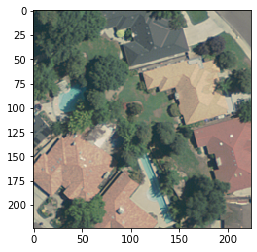

In [8]:
plt.imshow(img.T)

In [17]:
trans2 = transforms.ToPILImage()

In [18]:
ni = trans2(img)

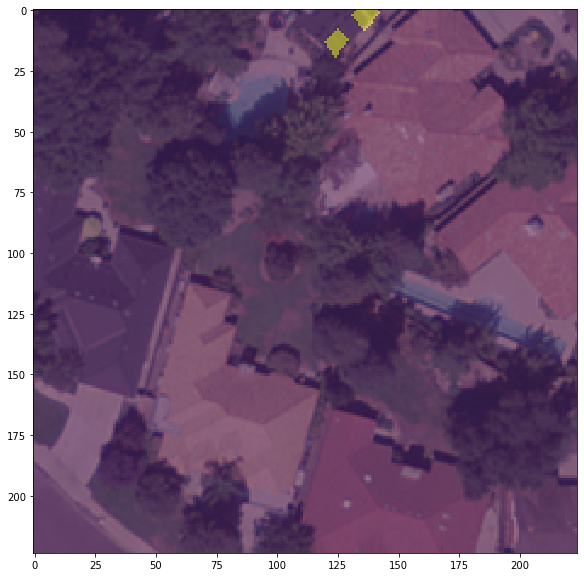

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(ni)
plt.imshow(mask[0], alpha=0.5)

In [12]:
img.T.shape

torch.Size([224, 224, 3])

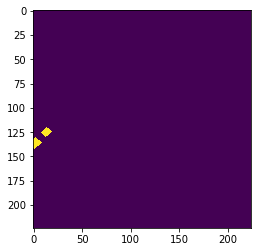

In [10]:
plt.imshow(mask[0].T)

In [30]:
mask.sum().item() > 0

False